In [52]:
from IPython.core.display import HTML
HTML("""
<style>
.consignes{
  font-weight: bold;
  color: #3256a8;
  background-color: #edebdf
}
</style>
""")

# <div class=consignes>Deep Learning et traitement du signal TP 1 </div>
<div class=consignes> L'objectif de ce TP est de prendre en main les outils de modélisation et d'analyse du signal présentés dans le premier cours et d'introduire la problématique de <it>détection</it> dont on parlera dans le cours numéro 3 </div> <br>
<div class=consignes>Deadline : 18 octobre 2023, 11h59, par mail à deepetsignal.mva@gmail.com <br> Effort estimé : 2 à 3 heures maximum</div><br>

<div class=consignes>Le rendu de ce TP n'est pas obligatoire. Il permet d'obtenir un bonus de 1 (minimum syndical) à 3 (votre notebook servira de correction l'an prochain) points sur la moyenne des TP </div>

<div class=consignes> Listez les noms des étudiants (2 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb </div>

### Etudiants:
<div>- Hugo Robert <br>- Matteo Marengo</div>

<div class=consignes>Si vous installez des paquets supplémentaires, merci de les lister dans la cellule suivante avec la syntaxe
    
```
!pip install \< nom_du_paquet \>
```
    
</div>

In [53]:
# paquets supplémentaires 

In [54]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import IPython.display as ipd

%matplotlib notebook
%matplotlib inline 

## <div class=consignes>Partie 1: Audio </div>

### <div class=consignes>Visualisation</div>

 <div class=consignes>Enregistrez un fichier wav de quelques secondes de votre voix. 
  <br>
 Importez le avec scipy.io.wavfile.read et écoutez le dans le notebook avec IPython.display.Audio
</div>

In [55]:
fe, x = scipy.io.wavfile.read('coloniedefourmies_16k.wav') # fe est la fréquence d'échantillonage
print('Fréquence échantillonnage:',fe,'Hz')
print('Période échantillonnage:',1/fe,'s')
ipd.Audio(x, rate=fe) # fonction pour écouter le signal

Fréquence échantillonnage: 16000 Hz
Période échantillonnage: 6.25e-05 s


<div class=consignes>Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez. 
    </div>

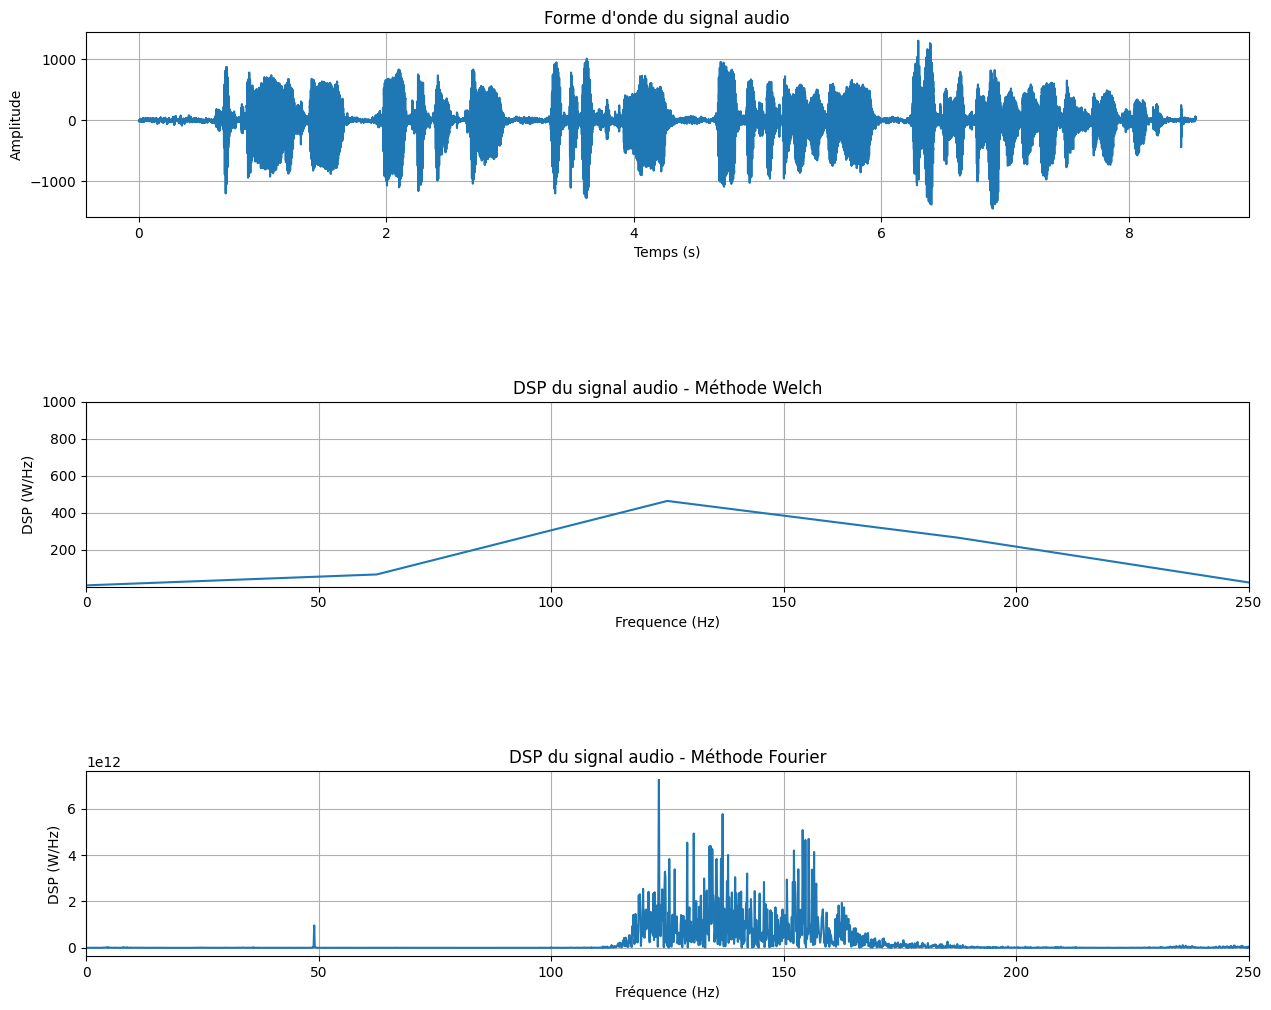

La Fréquence où la DSP atteint son maximum est en 125 Hz


In [56]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(15, 12)) # on forme trois figures distinctes

# 1. Forme d'onde temporelle du signal audio
ax1.plot(np.arange(0, len(x)/fe, 1/fe), x)
ax1.set_xlabel('Temps (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()
ax1.set_title('Forme d\'onde du signal audio')

# 2. DSP avec la méthode Welch
f, fft_x = scipy.signal.welch(x, fe)
ax2.plot(f, fft_x) 
ax2.set_xlabel('Frequence (Hz)')
ax2.set_ylabel('DSP (W/Hz)')
ax2.set_xlim([0,250])
ax2.set_ylim([0.1,1000])
ax2.grid()
ax2.set_title('DSP du signal audio - Méthode Welch')

# 3. DSP avec la méthode de la transformée de Fourier
dsp = np.abs(np.fft.fft(x))**2 # la DSP est le carré de la magnitude de la TF du signal
freqs = np.fft.fftfreq(len(x), 1 / fe) # calcul des fréquences associées à la TF du signal

ax3.plot(freqs[:len(freqs)//2], dsp[:len(dsp)//2])
ax3.set_xlim([0,250])
ax3.set_xlabel('Fréquence (Hz)')
ax3.set_ylabel('DSP (W/Hz)')
ax3.set_title('DSP du signal audio - Méthode Fourier')
ax3.grid()

plt.subplots_adjust(hspace=1)
plt.show()

#get index of max of fft_x
max_index = np.argmax(fft_x[:int(len(fft_x)/2)])
freq_max = f[max_index]
print("La Fréquence où la DSP atteint son maximum est en", int(freq_max), "Hz")


<h5><b>Observation:</b></h5>
    <div><b>Forme audio: </b> Le fichier audio est une voix qui dit plusieurs morts espacés de blanc. C'est pour cette raison que l'on observe des pics d'amplitudes ainsi que des zone d'amplitudes proches de 0 en fonction du temps. Ces variations d'amplitudes reflétent l'articulation des mots prononcés et les silences entre eux.</div><br>
    <div><b>DSP :</b> Cette voix est inclue dans l'intervalle [70Hz; 210Hz] (car DSP(f=210Hz)<= DSP_max) correspondant aux fréquences fondamentales typiques de la voix masculine.   
	Le résultat obtenu est donc cohérent.</div>

<div class=consignes> Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.
    </div>

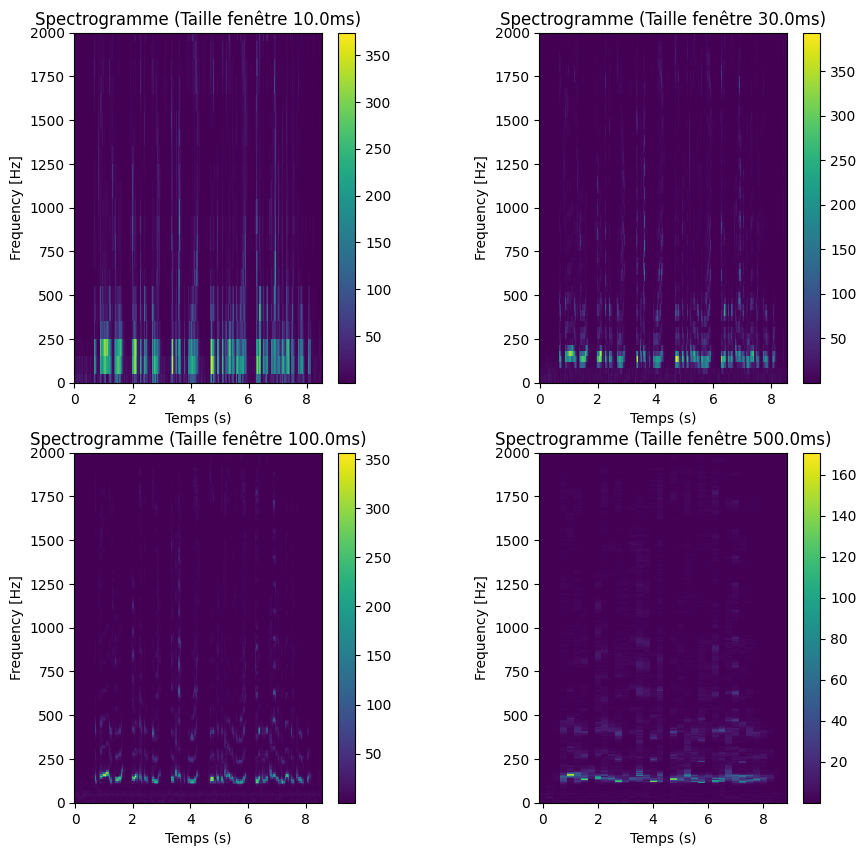

In [57]:
# paramètres
# npsergs correspond au nombre d'échantillons du signal dans chaque segment temporel
npsergs = [fe*0.01, fe*0.03, fe*0.1, fe*0.5] # on teste pour différentes valeurs de npserg

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    # stft: short fourier transform, f: array of sample frequencies, tfct: array of segment times, Zxx: Stft of x
    f,tfct,Zxx = scipy.signal.stft(x, fs=fe, nperseg=npsergs[i],nfft=npsergs[i],noverlap = npsergs[i]//2)
    axs[i//2, i%2].pcolormesh(tfct, f, np.abs(Zxx))
    fig.colorbar(axs[i//2, i%2].pcolormesh(tfct, f, np.abs(Zxx)), ax=axs[i//2, i%2])
    axs[i//2, i%2].set_ylabel('Frequency [Hz]')
    axs[i//2, i%2].set_xlabel('Temps (s)')
    axs[i//2, i%2].set_ylim(0, 2000)
    axs[i//2, i%2].set_title('Spectrogramme (Taille fenêtre '+str(npsergs[i]/fe*1000)+'ms)')
plt.subplots_adjust(wspace=0.5)
plt.show()

<h5><b>Observations:</b></h5>
	<div>On choisit les paramètres nperseg=100ms qui permet d'obtenir la meilleur résolution      
	en fréquence possible sans avoir de gommage sur les effets transitoires.</div>

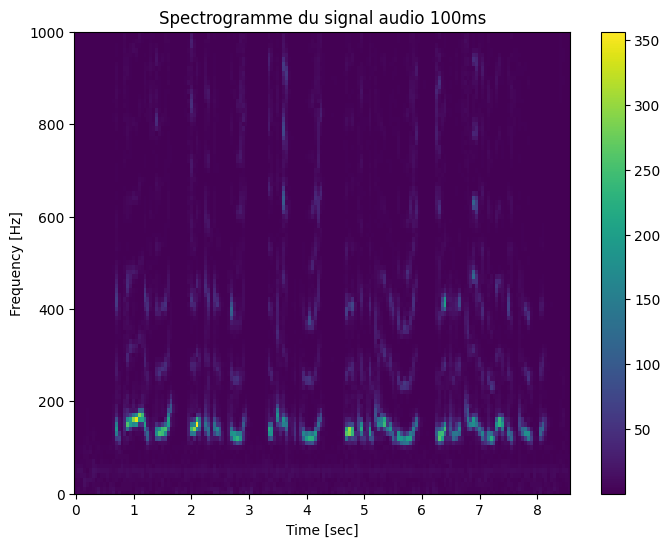

In [58]:
#paramètre
npserg = npsergs[2]

plt.figure(figsize=(8, 6))
f,tfct,Zxx = scipy.signal.stft(x, fs=fe, nperseg=npserg,nfft=npserg,noverlap = npserg//2)
plt.pcolormesh(tfct, f, np.abs(Zxx))
plt.colorbar(plt.pcolormesh(tfct, f, np.abs(Zxx)))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 1000)
plt.title('Spectrogramme du signal audio 100ms')
plt.show()

<h5><b>Estimation visuelle du pitch:</b></h5>
<div>Afin d'évaluer le pitch de la voix, on sélectionne une proportion contenant un son voisé.
Ici, on prend la fin de la première phrase (qui finit par le mot "fourmIE" afin d'analyser la prononciation du "I" long qui est un son voisée). Celui-ci correspond environ à l'intervalle [1.4s; 1.6s], on mesure une fréquence d'environ <b>120Hz</b> (ce qui est cohérent avec l'observation faite précédement sur la DSP)</div>

### <div class=consignes>Calcul du Pitch</div>

<div class=consignes>Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix (cette méthode ne doit pas faire intervenir d'implémentations externes).

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle. 

Commentez.
    </div>

<h5><b>Proposition de méthode: </b></h5> 
<div>Pour chaque intervalle de 20ms, on calcul la fft du signal. Puis sur chacun de ces échantillons ont relève le maximum d'amplitude qui correspond alors au pitch local du signal. En effet, le maximum d'amplitude correspond à la fréquence dite fondamentale. On peut alors, à partir de ces points, tracer les variations du pitch le long du signal.</div>

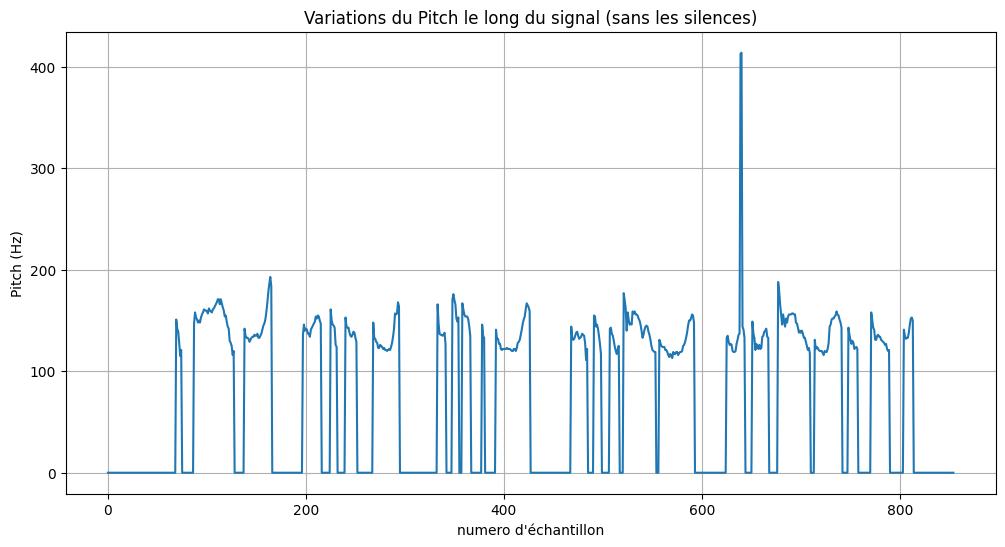

Moyenne de la valeur des pitches: 139.13832199546485 Hz


In [59]:
# paramètres
fMax= 450
amplitudeMin = 50

# idée : relever le max de la fft sur l'ensemble des fréquence sur chaque intervalle de 20ms.
f,_,Zxx = scipy.signal.stft(x, fs=fe, nperseg=fe*0.02,nfft=fe)
valid_indices = np.where((f < fMax))[0] # on exclu les fréquence beaucoup trop hautes pour une voix humaine
pitches = []
for Z in Zxx.T:
    if max(Z) < amplitudeMin: # on considère le pitch=0 quand il n'y a pas de son
        pitches.append(0)
    else:
        pitches.append(f[valid_indices][np.argmax(np.abs(Z[valid_indices]))])

plt.figure(figsize=(12,6))
plt.plot(pitches)
plt.grid()
plt.title('Variations du Pitch le long du signal (sans les silences)')
plt.xlabel('numero d\'échantillon')
plt.ylabel('Pitch (Hz)')
plt.show()

# calcul de la moyenne des pitchs
pitch_non_neg = []
for i in range(len(pitches)):
    if pitches[i] != 0 and pitches[i] < 200:
        pitch_non_neg.append(pitches[i])
    
mean_pitches = np.mean(pitch_non_neg)
print('Moyenne de la valeur des pitches:',mean_pitches,'Hz')


<h5><b>Commentaires:</b></h5>
<div>On observe que tous les échantillons où il y a une parole le pitch de la voix est plus ou moins constant autour d'une valeur d'environ 140 Hz. Cette fréquence est également proche de la valeur du maximum de la DSP. Dès lors, la méthode employée pour trouver le pitch est cohérente. </div>

## <div class=consignes>Partie 2: Détection d'impulsion </div>

<div class=consignes> Un signal de durée 1 seconde et échantillonné à <b>1000 Hz</b> est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 
<br><br>
Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichier contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 

</div>

In [60]:
donnees = np.load('signaux_impulsions.npz')
signaux = donnees['data']
labels = donnees['labels']

## <div class=consignes> Première méthode </div>

<div class=consignes> Proposez une méthode simple  pour décider si un signal contient une impulsion ou non à partir du calcul de l'énergie du signal. Cette méthode fera intervenir un seuil: 
</div>

```python
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
```

<h5><b>Proposition de méthode:</b></h5>
<div>L'énergie d'un signal est une mesure de sa puissance sur toute sa durée. Si un signal contient une impulsion (ou une brusque augmentation de l'amplitude), son énergie devrait être significativement plus élevée que celle d'un signal sans impulsion. Nous pouvons dès lors utiliser cette propriété pour détecter la présence d'une impulsion dans un signal.</div>

In [61]:
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
    Te=1/1000 # période de l'échantillonnage
    energy = Te*np.sum(signal**2) # calcul de l'énergie via la définition
    return energy > seuil

<div class=consignes>
Utilisez votre méthode avec un seuil fixé sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 
</div>

In [62]:
seuil = 0.3
contient_impulsion = []
for signal in signaux:
    contient_impulsion.append(contient_impulsion_energie(signal, seuil))

<div class=consignes>
Calculez: <br>
- VP = le nombre de signaux que vous détectez comme contenant une impulsion qui contiennet effectivement une impulsion <br>
- FP = le nombre de signaux que vous détectez comme contenant une impulsion qui ne contiennet en fait PAS une impulsion <br>
- VN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion qui ne contiennet effectivement PAS une impulsion<br>
- FN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion mais qui  contiennet en fait une impulsion
</div>

In [63]:
VP, FP, VN, FN= 0, 0, 0, 0
for i in range(len(contient_impulsion)):
    if contient_impulsion[i] and labels[i]:
        VP += 1
    if contient_impulsion[i] and not labels[i]:
        FP += 1
    if not contient_impulsion[i] and not labels[i]:
        VN += 1
    if not contient_impulsion[i] and labels[i]:
        FN += 1
print("VN =", VN, "\tVP =", VP, "\nFN =", FN, "\tFP =", FP)

VN = 3714 	VP = 2086 
FN = 2918 	FP = 1282


<h5><b>Ajustements:</b></h5>

<div> Si cette méthode donne trop de faux positifs (signal sans impulsion détecté comme contenant une impulsion), on peut essayer d'augmenter le seuil. Si cette méthode donne trop de faux négatifs (signal avec impulsion non détecté), on peut essayer de réduire le seuil. Cette méthode est intuitive et simple à mettre en œuvre, mais elle peut nécessiter quelques essais pour affiner le seui. </div>

## <div class=consignes>Deuxième méthode </div>

<div class=consignes>Proposez une deuxième méthode faisant par exemple intervenir le spectrogramme du signal. Cette méthode fera encore intervenir un seuil
</div>

```python
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
```


In [64]:
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
    # calculate spectrogram of signal
    _,_,Zxx = scipy.signal.stft(signal, fs=2000, nperseg=40,nfft=100)
    # pour chaque tranche temporelle du spectrogramme on peu sommer l'intensité sur toutes les fréquences pour avoir une mesure
    # de la puissance totale du signal à cet instant précis
    return np.max(np.abs(Zxx)) > seuil

<div class=consignes> Calculez pour cette nouvelle méthode, pour un certain seuil les valeurs de VP, FP, VN, FN </div>

In [65]:
seuil = 0.45
ratio = []
contient_impulsion = []
for signal in signaux:
    contient_impulsion.append(contient_impulsion_spectrogramme(signal, seuil))
# compter le nombre d'indice ou contient_impulsion == labels
VP, FP, VN, FN= 0, 0, 0, 0
for i in range(len(contient_impulsion)):
    if contient_impulsion[i] and labels[i]:
        VP += 1
    if contient_impulsion[i] and not labels[i]:
        FP += 1
    if not contient_impulsion[i] and not labels[i]:
        VN += 1
    if not contient_impulsion[i] and labels[i]:
        FN += 1
print("VN =", VN, "\tVP =", VP, "\nFN =", FN, "\tFP =", FP)

VN = 4963 	VP = 4853 
FN = 151 	FP = 33


## <div class=consignes> Comparaison des méthodes </sdivs>

<div class=consignes>Pour une méthode de détection et un seuil donné, la précision est définie comme: 
$$ \frac{VP}{VP + FP}$$
et le rappel comme:
$$ \frac{VP}{VP +FN} $$
    
</div>

<div class=consignes> Donnez une interprétation de ces deux métriques </div>

<h5><b> Interprétation des deux métriques: </b></h5>
<div><b>Précision : </b><br>
        Indique la proportion de réponse correct parmis les prédictions du modèle indiquant une impulsion. Plus elle est grande, plus le modèle a tendance à faire peu d'erreurs lorsqu'il prédit qu'un signal comporte une impulsion.</div><br>
<div><b> Rappel :  </b><br>
        Indique la proportion de réponse correct parmis tous les échantillons contenant une impulsion. Plus elle est grande, plus le modèle a tendance à faire peu d'erreurs lorsqu'un signal comportant une impulsion lui est soumis.</div>

<div class=consignes>
    Pour chacune des deux méthodes proposées, faites varier le seuil sur une dizaine de valeurs et calculez la précision et le rappel pour chacun de ces seuils. 

Affichez dans le plan (précision , rappel) les points de fonctionnement des deux méthodes pour différents seuils. <br>Commentez le résultat. 
    </div>

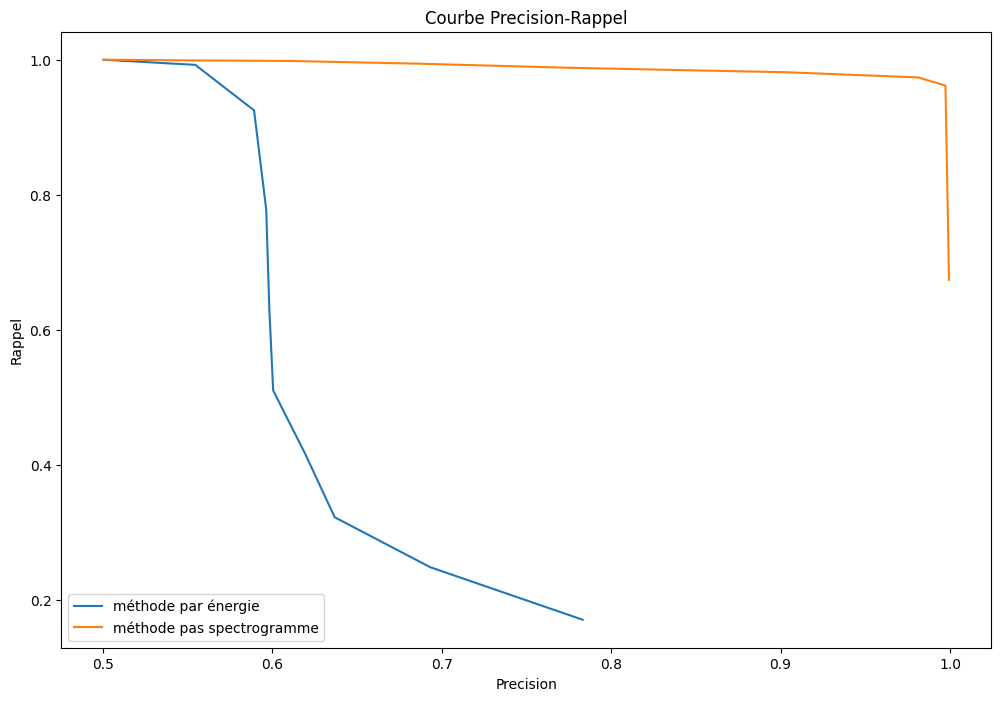

In [66]:
# Fonction pour calculer la précision et le rappel pour chacune des prédictions

def compute_precision_rappel(labels, predictions):
    VP, FP, VN, FN= 0, 0, 0, 0
    for i in range(len(predictions)):
        if predictions[i] and labels[i]:
            VP += 1
        if predictions[i] and not labels[i]:
            FP += 1
        if not predictions[i] and not labels[i]:
            VN += 1
        if not predictions[i] and labels[i]:
            FN += 1
    if (VP+FP) == 0:
        precision = 0
    else:
        precision = VP/(VP+FP)
    if (VP+FN) == 0:
        rappel = 0
    else:
        rappel = VP/(VP+FN)
    return precision, rappel

# Utilisation de la méthode 1

seuils = np.arange(0, 0.5, 0.05)
precision_energy, rappel_energy = [], []
for seuil in seuils:
    prediction_nrj = []
    for signal in signaux:
        prediction_nrj.append(contient_impulsion_energie(signal, seuil))
    precision, rappel = compute_precision_rappel(labels, prediction_nrj)
    precision_energy.append(precision)
    rappel_energy.append(rappel)
    
# Utilisation de la méthode 2
seuils = np.arange(0, 0.6, 0.06)
precision_spectro, rappel_spectro = [], []
for seuil in seuils:
    prediction_spectro = []
    for signal in signaux:
        prediction_spectro.append(contient_impulsion_spectrogramme(signal, seuil))
    precision, rappel = compute_precision_rappel(labels, prediction_spectro)
    precision_spectro.append(precision)
    rappel_spectro.append(rappel)

# Affichage et Comparaison des deux méthodes
plt.figure(figsize=(12, 8))
plt.plot(precision_energy, rappel_energy, label='méthode par énergie')
plt.plot(precision_spectro, rappel_spectro, label='méthode pas spectrogramme')
plt.xlabel('Precision')
plt.ylabel('Rappel')
plt.title('Courbe Precision-Rappel')
plt.legend()
plt.show()

<h5><b>Observations & Conclusion: </b></h5><div> On observe que la méthode par spectrogramme est bien plus efficace.</div><br>
<div> En effet, la méthode du spectrogramme nous permet par exemple d'atteindre une point de fonctionnement (rappel=0.98, precision=0.99). Tandis qu'avec la méthode d'énergie, un rappel >= 0.98 impliquerais une precision < 0.6 et une precision >= 0.99 n'est pas atteinte </div>

<h5><b>Avantages et Inconvénients des deux méthodes:</b></h5>

<h7><b>Méthode énergie - Avantages : </b></h7>
<div><b>- Simplicité :</b> Elle est directe et ne nécessite pas de transformations complexes.</div>
<div><b>- Efficacité computationnelle :</b> Elle est généralement plus rapide car elle ne nécessite pas le calcul d'une transformée de Fourier à court terme (STFT) comme dans le spectrogramme.</div>

<h7><b>Méthode énergie - Inconvénients : </b></h7>
<div><b>- Sensibilité au bruit :</b> Si le signal a un bruit de fond, cela peut affecter le calcul de l'énergie et donc la détection de l'impulsion.</div>

<h7><b>Méthode spectrogramme - Avantages</b></h7>
<div><b>- Résolution en fréquence :</b> Permet de détecter des impulsions sur la base du contenu spectral, ce qui peut être utile pour distinguer différents types d'impulsions.</div>
<div><b>- Robustesse face au bruit : </b> Avec la représentation en fréquence, il est possible de détecter des impulsions même si elles sont masquées dans le domaine temporel par le bruit.</div>

<h7><b>Méthode spectrogramme - Inconvénients</b></h7>
<div><b>- Complexité computationnelle : </b> Le calcul d'un spectrogramme est plus coûteux que le simple calcul de l'énergie.</div>
<div><b>- Choix des paramètres : </b> Le choix de la fenêtre et de sa taille peut influencer la détection.</div>  
